In [10]:
import os
if os.path.exists('checkpoint_local/latest_model.pkl'):
#if os.path.exists('./checkpoint/latest_model.pth'):
    print('load model from ./checkpoint/latest_model.pth ...')

load model from ./checkpoint/latest_model.pth ...


In [32]:
import os
import random

import numpy as np
import cv2

from utils import augmentation
import torch
from torch.utils.data.dataset import Dataset
from torchvision import transforms
from PIL import Image, ImageFilter
with open("datasets/SocialAI/annotation_train_lin.csv") as f:
    lines = f.read().splitlines()
    
lines
lines.pop(0)
print(len(lines))
line=lines[1]
line.split(",")[1]
high_res=True
shigh_res = str(high_res)
training_val=False
sdistances = [1,2,3]
straining_val = str(training_val)
high_res_line = line.split(",")[2]#chage
slines=[]
for line in lines:
    if shigh_res == "True":
        high_res_line = "True"
    if line.split(",")[-1] == straining_val and int(line.split(",")[6]) in sdistances and high_res_line == shigh_res:
        if abs(np.double(line.split(",")[3])*180/np.pi) <= 60 and abs(np.double(line.split(",")[4])*180/np.pi) <= 60:
            slines.append(line)

39150


In [33]:
line.split(",")[-1] == straining_val

False

In [34]:
line=lines[0]
line.split(",")[6] 
len(slines)


4050

In [34]:
import os
import random

import numpy as np
import cv2

from utils import augmentation
import torch
from torch.utils.data.dataset import Dataset
from torchvision import transforms
from PIL import Image, ImageFilter


def __init__(self, transform, binwidth = 3 , high_res = False, train=True, training_val = True, distances = [1,2,3]):
        self.transform = transform
        self.root = "datasets/SocialAI/"
        self.training_val = str(training_val)
        self.orig_list_len = 0
        self.train = str(train)
        self.distances = distances # 1,2,3 need to be an array
        self.high_res = str(high_res)
        # self.angle = angle
        self.binwidth = binwidth
        self.lines = []
        # path = pathorg.copy()
        # if train==True:
        #     path.pop(fold)
        # else:
        #     path=path[fold]

        if self.train == "True":
            with open("datasets/SocialAI/annotation_train_lin.csv") as f:
                lines = f.read().splitlines()
                lines.pop(0)
                self.orig_list_len = len(lines)
                for line in lines:
                    # if line.split(",")[-2] == self.train and line.split(",")[3] == self.high_res and int(line.split(",")[-1]) in self.rows:
                    high_res_line = line.split(",")[1]
                    if self.high_res == "True":
                        high_res_line = "True"
                    if line.split(",")[-1] == self.training_val and int(line.split(",")[-3]) in self.distances and high_res_line == self.high_res:
                        if abs(np.double(line.split(",")[-4])*180/np.pi) <= 60 and abs(np.double(line.split(",")[-5])*180/np.pi) <= 60:
                          self.lines.append(line)
                print(len(self.lines))
        else:
            with open("datasets/SocialAI/annotation_test_lin.csv") as f:
                lines = f.read().splitlines()
                lines.pop(0)
                self.orig_list_len = len(lines)
                for line in lines:
                    # if line.split(",")[-2] == self.train and line.split(",")[3] == self.high_res and int(line.split(",")[-1]) in self.rows:
                    if int(line.split(",")[-2]) in self.distances:
                        if abs(np.double(line.split(",")[-3])*180/np.pi) <= 60 and abs(np.double(line.split(",")[-4])*180/np.pi) <= 60:
                          self.lines.append(line)

def __len__(self):
    return len(self.lines)

def __getitem__(self, idx):
    var = True
    if self.train == "True":
        while var:
            line = self.lines[idx]

            pitch = np.double(line.split(",")[-4])
            yaw = np.double(line.split(",")[-5])

            face_path = line.split(",")[-2]
            try:
                img = Image.open(os.path.join(self.root, face_path))
                var = False
            except:
                idx = idx - 1
    else:
        while var:
            line = self.lines[idx]

            pitch = np.double(line.split(",")[-3])
            yaw = np.double(line.split(",")[-4])

            face_path = line.split(",")[-1]
            try:
                img = Image.open(os.path.join(self.root, face_path))
                var = False
            except:
                idx = idx - 1

    if self.transform:
        img = self.transform(img)

        # label = [np.double(el) for el in line.split('"')[1].split(",")]  # yaw, pitch
    label = np.array([np.double(yaw), np.double(pitch)])
    # name = line[3]
    # gaze2d = line[7]
    # head2d = line[8]
    # lefteye = line[1]
    # righteye = line[2]
    # face = line[0]

    # label = np.array(gaze2d.split(",")).astype("float")
    label = torch.from_numpy(label).type(torch.FloatTensor) # rad

    pitch = label[0] * 180 / np.pi
    yaw = label[1] * 180 / np.pi

    img = np.array(img)
    # print(img.shape)
    # img = np.moveaxis(img, -1, 0)
    # img = np.resize(img, [3,95,75])

    # print(img.shape)
    # if random.randint(0, 1) == 1:
    #     img, yaw = augmentation(img, yaw)
    # img = Image.fromarray(img)


    # fimg = cv2.imread(os.path.join(self.root, face))
    # fimg = cv2.resize(fimg, (448, 448))/255.0
    # fimg = fimg.transpose(2, 0, 1)

    img=torch.from_numpy(img).type(torch.FloatTensor)
    # print(img.shape)

    # Bin values
    angle = 180
    bins = np.array(range(-angle, angle, self.binwidth))
    binned_pose = np.digitize([pitch, yaw], bins) - 1

    labels = binned_pose
    cont_labels = torch.FloatTensor([pitch, yaw])

    return img, labels, cont_labels


In [35]:
self.root

NameError: name 'self' is not defined

In [36]:
import datasets_local_lin as datasets_local
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader
from torchvision import transforms
transformations = transforms.Compose([
    transforms.Resize((448, 448)),  # old: transforms.Resize(448),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

batch_size=16
train_dataset = datasets_local.SocialAI(transform = transformations, train=True, training_val=True, high_res=True)

train_dataset 
# train_loader_gaze = DataLoader(
#     dataset=train_dataset,
#     batch_size=int(batch_size),
#     shuffle=True,
#     num_workers=4,
#     pin_memory=True)

eval_dataset = datasets_local.SocialAI(transform = transformations, train=True, training_val=False, high_res=True)
# eval_loader_gaze = DataLoader(
#     dataset=eval_dataset,
#     batch_size=int(batch_size),
#     shuffle=True,
#     num_workers=4,
#     pin_memory=True,)
#train_dataset[1]

35100
4050


In [42]:
print(train_dataset[0][2],train_dataset[6][2],train_dataset[90][2])

tensor([-20.3394,  28.9625]) tensor([-28.6414,   3.5866]) tensor([11.5833,  7.1790])


In [44]:
print(eval_dataset[0][2],eval_dataset[12][2],eval_dataset[20][2],)

tensor([ 3.3534, 29.7032]) tensor([-18.9933,  17.3272]) tensor([-30.5373,  15.7196])


In [45]:
print(-0.33/3.1418*180,0.302/3.1418*180)

-18.906359411802153 17.30218346170985


In [23]:
import pandas as pd
df=pd.read_csv('datasets/SocialAI/annotation_train.csv')
df_new=df.copy()
df[df['Train']==True]['person_ID'].unique()


array([ 2, 21,  5,  4, 15,  9,  7,  8, 19,  1, 20, 14, 18])

In [21]:
df[df['Train']==False]['person_ID'].unique()
#df[df['Train']==False][['person_ID','4k']]

array([13, 12])

In [27]:
27439/20

1371.95

In [25]:
df[df['4k']==True]['person_ID'].unique()

array([20, 13, 19, 14, 12, 18, 15, 21,  4,  2])

In [29]:
df[(df['4k']==True)&(df['person_ID']==13)]

,Unnamed: 0,4k,dotNr,corrResp,fName,sampTime,person_ID,height,glasses,pos_number,yaw,pitch,line,path,Train
20944,10745,True,12,True,2022_11_30_16_4_46_73783264_00001.jpg,357.977299,13,167.0,True,1,-0.121623,0.112190,1,headcrop134k/2022_11_30_16_4_46_73783264_00001...,False
20945,10746,True,12,True,2022_11_30_16_4_46_73783264_00002.jpg,359.394409,13,167.0,True,1,-0.121623,0.112190,1,headcrop134k/2022_11_30_16_4_46_73783264_00002...,False
20946,10747,True,12,True,2022_11_30_16_4_46_73783264_00003.jpg,359.700831,13,167.0,True,1,-0.121623,0.112190,1,headcrop134k/2022_11_30_16_4_46_73783264_00003...,False
20947,10748,True,12,True,2022_11_30_16_4_46_73783264_00004.jpg,360.000825,13,167.0,True,1,-0.121623,0.112190,1,headcrop134k/2022_11_30_16_4_46_73783264_00004...,False
20948,10749,True,12,True,2022_11_30_16_4_46_73783264_00005.jpg,360.269928,13,167.0,True,1,-0.121623,0.112190,1,headcrop134k/2022_11_30_16_4_46_73783264_00005...,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22262,12090,True,4,True,2022_11_30_16_4_46_73783264_01346.jpg,1331.728878,13,167.0,True,9,0.208597,0.220249,3,headcrop134k/2022_11_30_16_4_46_73783264_01346...,False
22263,12091,True,4,True,2022_11_30_16_4_46_73783264_01347.jpg,1332.041833,13,167.0,True,9,0.208597,0.220249,3,headcrop134k/2022_11_30_16_4_46_73783264_01347...,False
22264,12092,True,4,True,2022_11_30_16_4_46_73783264_01348.jpg,1332.322100,13,167.0,True,9,0.208597,0.220249,3,headcrop134k/2022_11_30_16_4_46_73783264_01348...,False
22265,12093,True,4,True,2022_11_30_16_4_46_73783264_01349.jpg,1332.634409,13,167.0,True,9,0.208597,0.220249,3,headcrop134k/2022_11_30_16_4_46_73783264_01349...,False


In [60]:
df[df['Train']==False]

,Unnamed: 0,4k,dotNr,corrResp,fName,sampTime,person_ID,height,glasses,pos_number,yaw,pitch,line,path,Train
10448,22895,False,12,True,2022_11_30_16_4_46_73783264_00001.jpg,357.977299,13,167.0,True,1,-0.120677,0.126195,1,headcrop13/2022_11_30_16_4_46_73783264_00001.jpg,False
10449,22896,False,12,True,2022_11_30_16_4_46_73783264_00002.jpg,359.394409,13,167.0,True,1,-0.120677,0.126195,1,headcrop13/2022_11_30_16_4_46_73783264_00002.jpg,False
10450,22897,False,12,True,2022_11_30_16_4_46_73783264_00003.jpg,359.700831,13,167.0,True,1,-0.120677,0.126195,1,headcrop13/2022_11_30_16_4_46_73783264_00003.jpg,False
10451,22898,False,12,True,2022_11_30_16_4_46_73783264_00004.jpg,360.000825,13,167.0,True,1,-0.120677,0.126195,1,headcrop13/2022_11_30_16_4_46_73783264_00004.jpg,False
10452,22899,False,12,True,2022_11_30_16_4_46_73783264_00005.jpg,360.269928,13,167.0,True,1,-0.120677,0.126195,1,headcrop13/2022_11_30_16_4_46_73783264_00005.jpg,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26172,18840,True,4,True,2022_11_30_13_58_47_93080396_01346.jpg,1732.513638,12,174.5,False,9,0.209035,0.223156,3,headcrop124k/2022_11_30_13_58_47_93080396_0134...,False
26173,18841,True,4,True,2022_11_30_13_58_47_93080396_01347.jpg,1732.806284,12,174.5,False,9,0.209035,0.223156,3,headcrop124k/2022_11_30_13_58_47_93080396_0134...,False
26174,18842,True,4,True,2022_11_30_13_58_47_93080396_01348.jpg,1733.083888,12,174.5,False,9,0.209035,0.223156,3,headcrop124k/2022_11_30_13_58_47_93080396_0134...,False
26175,18843,True,4,True,2022_11_30_13_58_47_93080396_01349.jpg,1733.389552,12,174.5,False,9,0.209035,0.223156,3,headcrop124k/2022_11_30_13_58_47_93080396_0134...,False


In [62]:
print(-0.12/3.1418*180, 0.126/3.1418*180)

-6.875039786109873 7.218791775415368


In [68]:
11.9768/180*3.14

0.20892862222222222

In [20]:
import pandas as pd
df=pd.read_csv('datasets/SocialAI/annotation_train.csv')
df_new=df.copy()
df_new=df[(df['person_ID']!=13)&(df['person_ID']!=15)]


In [28]:
df_new=df_new.drop(columns='Unnamed: 0')
df_new

,4k,dotNr,corrResp,fName,sampTime,person_ID,height,glasses,pos_number,yaw,pitch,line,path,Train
0,False,6,True,2022_12_12_16_5_38_75058215_00001.jpg,238.444496,2,160.0,True,1,-0.331419,0.301109,1,headcrop2/2022_12_12_16_5_38_75058215_00001.jpg,True
1,False,6,True,2022_12_12_16_5_38_75058215_00002.jpg,239.900184,2,160.0,True,1,-0.331419,0.301109,1,headcrop2/2022_12_12_16_5_38_75058215_00002.jpg,True
2,False,6,True,2022_12_12_16_5_38_75058215_00003.jpg,240.205551,2,160.0,True,1,-0.331419,0.301109,1,headcrop2/2022_12_12_16_5_38_75058215_00003.jpg,True
3,False,6,True,2022_12_12_16_5_38_75058215_00004.jpg,240.473843,2,160.0,True,1,-0.331419,0.301109,1,headcrop2/2022_12_12_16_5_38_75058215_00004.jpg,True
4,False,6,True,2022_12_12_16_5_38_75058215_00005.jpg,240.727508,2,160.0,True,1,-0.331419,0.301109,1,headcrop2/2022_12_12_16_5_38_75058215_00005.jpg,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32699,True,4,True,2022_12_12_16_5_38_75058215_01346.jpg,1221.101385,2,160.0,True,9,0.208106,0.217338,3,headcrop24k/2022_12_12_16_5_38_75058215_01346.jpg,True
32700,True,4,True,2022_12_12_16_5_38_75058215_01347.jpg,1221.450533,2,160.0,True,9,0.208106,0.217338,3,headcrop24k/2022_12_12_16_5_38_75058215_01347.jpg,True
32701,True,4,True,2022_12_12_16_5_38_75058215_01348.jpg,1221.798563,2,160.0,True,9,0.208106,0.217338,3,headcrop24k/2022_12_12_16_5_38_75058215_01348.jpg,True
32702,True,4,True,2022_12_12_16_5_38_75058215_01349.jpg,1222.143746,2,160.0,True,9,0.208106,0.217338,3,headcrop24k/2022_12_12_16_5_38_75058215_01349.jpg,True


In [29]:
df_new.to_csv('datasets/SocialAI/annotation_train_no1315.csv')

In [24]:
df_new.columns


Index(['Unnamed: 0', '4k', 'dotNr', 'corrResp', 'fName', 'sampTime',
       'person_ID', 'height', 'glasses', 'pos_number', 'yaw', 'pitch', 'line',
       'path', 'Train'],
      dtype='object')

In [33]:
import os
print('Get current working directory : ', os.getcwd())

Get current working directory :  /home/linlincheng/Documents/Projects/L2CS-Net-main


In [66]:
df_new[(df_new['Train']==False)&(df_new['4k']==False)]

,4k,dotNr,corrResp,fName,sampTime,person_ID,height,glasses,pos_number,yaw,pitch,line,path,Train
13070,False,10,True,2022_11_30_13_58_47_93080396_00001.jpg,753.149182,12,174.5,False,1,-0.486161,0.084521,1,headcrop12/2022_11_30_13_58_47_93080396_00001.jpg,False
13071,False,10,True,2022_11_30_13_58_47_93080396_00002.jpg,754.559249,12,174.5,False,1,-0.486161,0.084521,1,headcrop12/2022_11_30_13_58_47_93080396_00002.jpg,False
13072,False,10,True,2022_11_30_13_58_47_93080396_00003.jpg,754.913954,12,174.5,False,1,-0.486161,0.084521,1,headcrop12/2022_11_30_13_58_47_93080396_00003.jpg,False
13073,False,10,True,2022_11_30_13_58_47_93080396_00004.jpg,755.238883,12,174.5,False,1,-0.486161,0.084521,1,headcrop12/2022_11_30_13_58_47_93080396_00004.jpg,False
13074,False,10,True,2022_11_30_13_58_47_93080396_00005.jpg,755.563864,12,174.5,False,1,-0.486161,0.084521,1,headcrop12/2022_11_30_13_58_47_93080396_00005.jpg,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14370,False,4,True,2022_11_30_13_58_47_93080396_01346.jpg,1732.513638,12,174.5,False,9,0.209361,0.225668,3,headcrop12/2022_11_30_13_58_47_93080396_01346.jpg,False
14371,False,4,True,2022_11_30_13_58_47_93080396_01347.jpg,1732.806284,12,174.5,False,9,0.209361,0.225668,3,headcrop12/2022_11_30_13_58_47_93080396_01347.jpg,False
14372,False,4,True,2022_11_30_13_58_47_93080396_01348.jpg,1733.083888,12,174.5,False,9,0.209361,0.225668,3,headcrop12/2022_11_30_13_58_47_93080396_01348.jpg,False
14373,False,4,True,2022_11_30_13_58_47_93080396_01349.jpg,1733.389552,12,174.5,False,9,0.209361,0.225668,3,headcrop12/2022_11_30_13_58_47_93080396_01349.jpg,False


In [67]:
24805/1350


18.374074074074073

In [69]:
df=pd.read_csv('epoch_result.csv')
df

,Epoch,[1/60],len,dataset:27439,Iter,[500/1714],Losses:,Gaze,Yaw,48.4538,Gaze.1,Pitch,33.1379,Unnamed: 13,Unnamed: 14
0,Epoch,[1/60],len,dataset:27439,Iter,[1000/1714],Losses:,Gaze,Yaw,39.7068,Gaze,Pitch,27.4032,NaN,NaN
1,Epoch,[1/60],len,dataset:27439,Iter,[1500/1714],Losses:,Gaze,Yaw,35.2935,Gaze,Pitch,24.2163,NaN,NaN
2,start,validation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Validation:,Batch,size:,16,Test,lenght,5265,Losses:,Gaze,Yaw,121.4556,Gaze,Pitch,83.9242,NaN
4,Taking,snapshot...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,Checkpoint,saved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336,Epoch,[60/60],len,dataset:27439,Iter,[500/1714],Losses:,Gaze,Yaw,1.5435,Gaze,Pitch,1.2724,NaN,NaN
337,Epoch,[60/60],len,dataset:27439,Iter,[1000/1714],Losses:,Gaze,Yaw,1.5431,Gaze,Pitch,1.2656,NaN,NaN
338,Epoch,[60/60],len,dataset:27439,Iter,[1500/1714],Losses:,Gaze,Yaw,1.5414,Gaze,Pitch,1.2648,NaN,NaN


In [75]:
train_yaw=[22.3,11.6,8.1,6.5,5.7,5.14,4.6,4.3,4.0,3.8,3.6]
train_pitch=[18.9,9.7,7.1,5.8,5.12,4.7,4.1,3.8,3.6,3.4,3.2]
val_yaw=[36.5,38.5,25.4,28.0,26.5,18.8]
val_pitch=[63.18,29.6,46.1,29.4,28.4,29.54]
epoch_train=range(1,12)
epoch_val=[1,3,5,7,9,11]      

In [76]:
epoch_train

range(1, 12)

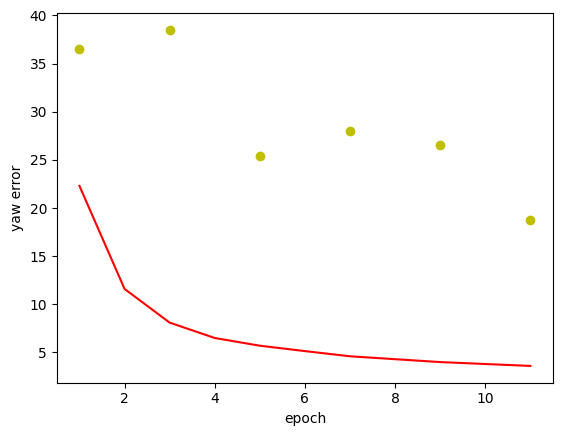

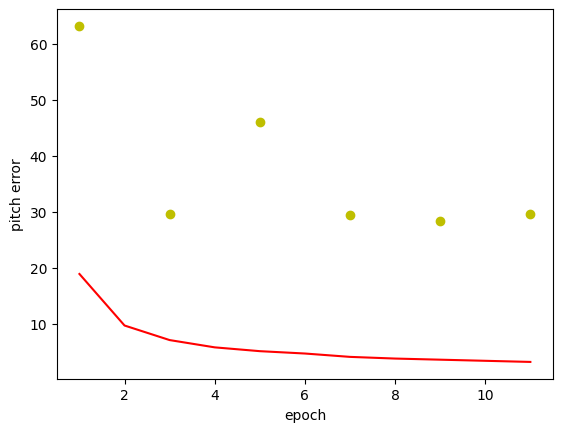

In [82]:
import matplotlib.pyplot as plt
plt.plot(epoch_train,train_yaw,'r')
plt.xlabel('epoch')
plt.ylabel('yaw error')
plt.plot(epoch_val,val_yaw,'yo')
plt.xlabel('epoch')
plt.ylabel('yaw error')
plt.show()

plt.plot(epoch_train,train_pitch,'r')
plt.xlabel('epoch')
plt.ylabel('pitch error')
plt.plot(epoch_val,val_pitch,'yo')

plt.show()

In [7]:
yaw_train=[172,70,49,39,34,33,31,30,29,28,28.5,28.1,26.2,26.1,26.6,25.0,25.2,25.2,24.8,24.2]
pitch_val=[107,99,90,83,75,74,74,71,72,75,72]

In [8]:
yaw_val=[79,56,56.1,52,51,43,41,43,41,40,42,20,42,41,42]
pitch_train=[148,76,67,61,49,46,43,43,41,41,41,40,40,40,38]


In [9]:
epoch_train=range(1,16)
epoch_val=range(1,11)
yaw_train[0:15]

[172, 70, 49, 39, 34, 33, 31, 30, 29, 28, 28.5, 28.1, 26.2, 26.1, 26.6]

In [10]:
len(epoch_train)
pitch_train

[148, 76, 67, 61, 49, 46, 43, 43, 41, 41, 41, 40, 40, 40, 38]

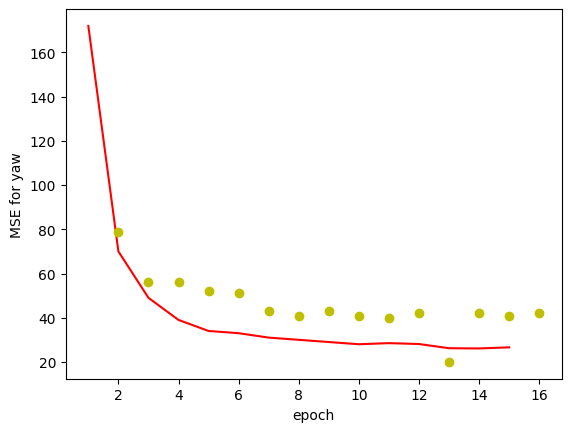

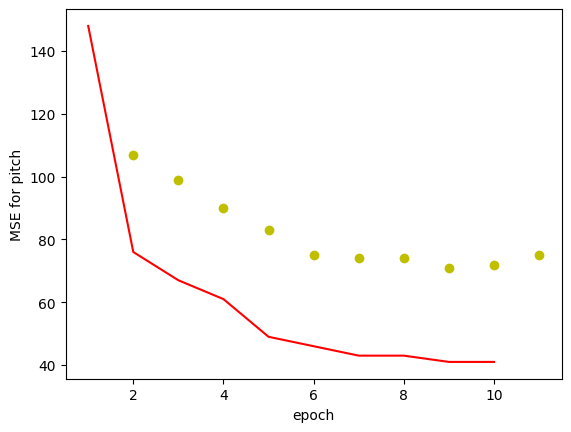

In [12]:
import matplotlib.pyplot as plt
plt.plot(epoch_train,yaw_train[0:15],'r')
plt.xlabel('epoch')
plt.ylabel('MSE for yaw')
plt.plot(range(2,17),yaw_val[0:15],'yo')
# plt.xlabel('epoch')
# plt.ylabel('yaw error')
plt.show()

plt.plot(epoch_val,pitch_train[0:10],'r')
plt.xlabel('epoch')
plt.ylabel('MSE for pitch')
plt.plot(range(2,12),pitch_val[0:10],'yo')

plt.show()

In [5]:
import cv2
import os
image_folder = 'datasets/SocialAI/headcrop5'
images = [img for img in os.listdir(image_folder) if (img.endswith(".jpg"))] 
frame = cv2.imread(os.path.join(image_folder, images[0]))
